[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/sardorhm5050/big_data_mustaqil_ish/blob/main/13_Energetika_statistikasi.ipynb)


# Energetika statistikasi (neft, gaz, elektr energiya ishlab chiqarish)

# 1-qadam: Kerakli kutubxonalarni yuklash

In [18]:
!pip install wbdata

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import wbdata

# 2-qadam: Ma'lumotlarni World Bank'dan yuklash

In [20]:
# O'zbekiston energetika ishlab chiqarish statistikasini olish
indicators = {
    'EG.USE.ELEC.KH.PC': "Elektron_energiya_iste'mol",
    'EG.IMP.CONS.ZS': 'Energiya_importi',
    'EG.FEC.RNEW.ZS': 'Qayta_tiklanuvchi_energiya',
    'EG.USE.COMM.FO.ZS': "An'anaviy_yoqilg'i_iste'mol"
}

# O'zbekiston ma'lumotlarini olish
uzbekistan_energy_prod = wbdata.get_dataframe(indicators, country='UZB')
uzbekistan_energy_prod = uzbekistan_energy_prod.reset_index()
uzbekistan_energy_prod.head()

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya,An'anaviy_yoqilg'i_iste'mol
0,2024,NaN,NaN,NaN,NaN
1,2023,NaN,NaN,NaN,NaN
2,2022,2094.052326,1.547590,NaN,98.36
3,2021,2118.900950,0.721053,1.0,98.52
4,2020,1758.034479,1.019315,1.0,98.57


In [23]:
# Ma'lumotlar to'g'risida ma'lumot olish
uzbekistan_energy_prod.info()

<class 'wbdata.client.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         65 non-null     object 
 1   Elektron_energiya_iste'mol   33 non-null     float64
 2   Energiya_importi             33 non-null     float64
 3   Qayta_tiklanuvchi_energiya   32 non-null     float64
 4   An'anaviy_yoqilg'i_iste'mol  33 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.7+ KB


In [24]:
# Asosiy statistik ko'rsatkichlar
uzbekistan_energy_prod.describe().round(2)

,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya,An'anaviy_yoqilg'i_iste'mol
count,33.00,33.00,32.00,33.00
mean,1736.69,-10.92,1.28,98.76
std,249.81,12.48,0.31,0.26
min,1473.39,-30.14,0.70,98.29
25%,1538.11,-20.09,1.00,98.57
50%,1637.81,-13.14,1.30,98.77
75%,1824.41,-6.16,1.52,98.94
max,2388.47,18.56,1.70,99.18


# 3-qadam: Ma'lumotlarni oldindan qayta ishlash

In [25]:
# Yetishmayotgan qiymatlarni tekshirish
uzbekistan_energy_prod.isnull().sum()

,0
date,0
Elektron_energiya_iste'mol,32
Energiya_importi,32
Qayta_tiklanuvchi_energiya,33
An'anaviy_yoqilg'i_iste'mol,32


In [21]:
# Data cleaning for available energy indicators
energy_data = uzbekistan_energy_prod[['date', 'Elektron_energiya_iste\'mol', 'Energiya_importi', 'Qayta_tiklanuvchi_energiya']].dropna()
energy_data = energy_data.reset_index(drop=True)
energy_data.head()

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya
0,2021,2118.900950,0.721053,1.0
1,2020,1758.034479,1.019315,1.0
2,2019,1824.406052,-19.679857,1.6
3,2018,1781.581164,-25.341537,1.5
4,2017,1582.379029,-15.470892,1.7


# 4-qadam: Eksplorativ ma'lumotlar tahlili

In [27]:
# Korrelyatsiya matritsasini hisoblash
corr_matrix = energy_data.corr().round(2)
corr_matrix

,date,Elektron_energiya_iste'mol,Energiya_importi,Qayta_tiklanuvchi_energiya
date,1.00,-0.52,-0.60,-0.04
Elektron_energiya_iste'mol,-0.52,1.00,0.86,0.10
Energiya_importi,-0.60,0.86,1.00,0.01
Qayta_tiklanuvchi_energiya,-0.04,0.10,0.01,1.00


In [28]:
# Diagrammalar uchun ma'lumotlarni tayyorlash
x1 = energy_data['Energiya_importi']
x2 = energy_data['Qayta_tiklanuvchi_energiya']
y = energy_data['Elektron_energiya_iste\'mol']

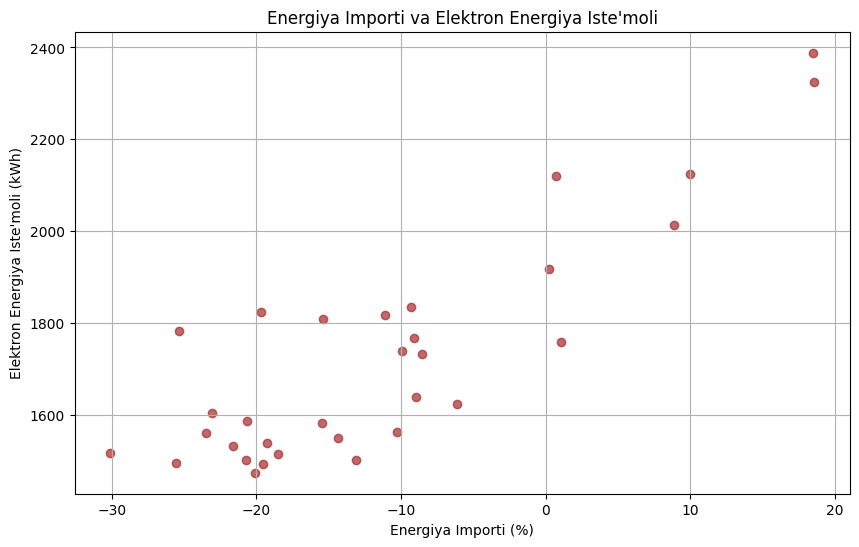

In [29]:
# Energiya importi va elektron energiya iste'moli o'rtasidagi bog'liqlik
plt.figure(figsize=(10, 6))
plt.scatter(x1, y, alpha=0.7, color='brown')
plt.title("Energiya Importi va Elektron Energiya Iste'moli")
plt.xlabel('Energiya Importi (%)')
plt.ylabel("Elektron Energiya Iste'moli (kWh)")
plt.grid(True)
plt.show()

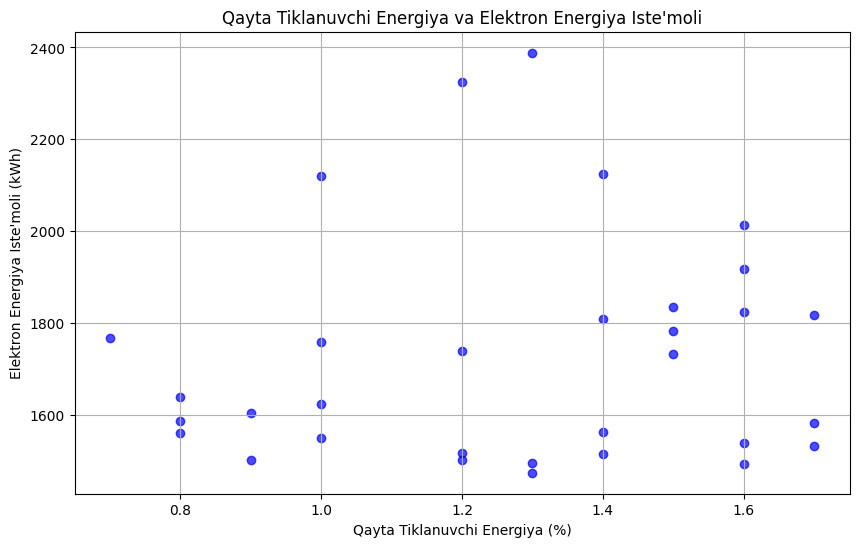

In [30]:
# Qayta tiklanuvchi energiya va elektron energiya iste'moli o'rtasidagi bog'liqlik
plt.figure(figsize=(10, 6))
plt.scatter(x2, y, alpha=0.7, color='blue')
plt.title("Qayta Tiklanuvchi Energiya va Elektron Energiya Iste'moli")
plt.xlabel('Qayta Tiklanuvchi Energiya (%)')
plt.ylabel("Elektron Energiya Iste'moli (kWh)")
plt.grid(True)
plt.show()

# 5-qadam: Regressiya modelini yaratish

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Xususiyatlar va maqsadli o'zgaruvchini belgilash
X = energy_data[['Energiya_importi', 'Qayta_tiklanuvchi_energiya']]
y = energy_data['Elektron_energiya_iste\'mol']

# Ma'lumotlarni trenirovka va test qismlariga ajratish
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelni yaratish va trenirovka qilish
model = LinearRegression()
model.fit(X_train, y_train)

# Bashorat qilish
y_pred = model.predict(X_test)

# 6-qadam: Modelni baholash

In [32]:
# Model natijalarini baholash
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"O'rtacha kvadratik xato (MSE): {mse:.2f}")
print(f"Determinatsiya koeffitsienti (R²): {r2:.2f}")

O'rtacha kvadratik xato (MSE): 8767.93
Determinatsiya koeffitsienti (R²): 0.91


In [33]:
# Model koeffitsientlari
print("Model koeffitsientlari:")
print(f"Fosil_yoqilg'idan_elektr: {model.coef_[0]:.4f}")
print(f"Gidro_energiyadan_elektr: {model.coef_[1]:.4f}")
print(f"Kesishish nuqtasi: {model.intercept_:.2f}")

Model koeffitsientlari:
Fosil_yoqilg'idan_elektr: 15.7836
Gidro_energiyadan_elektr: 68.0518
Kesishish nuqtasi: 1810.06


# 7-qadam: Natijalarni vizualizatsiya qilish

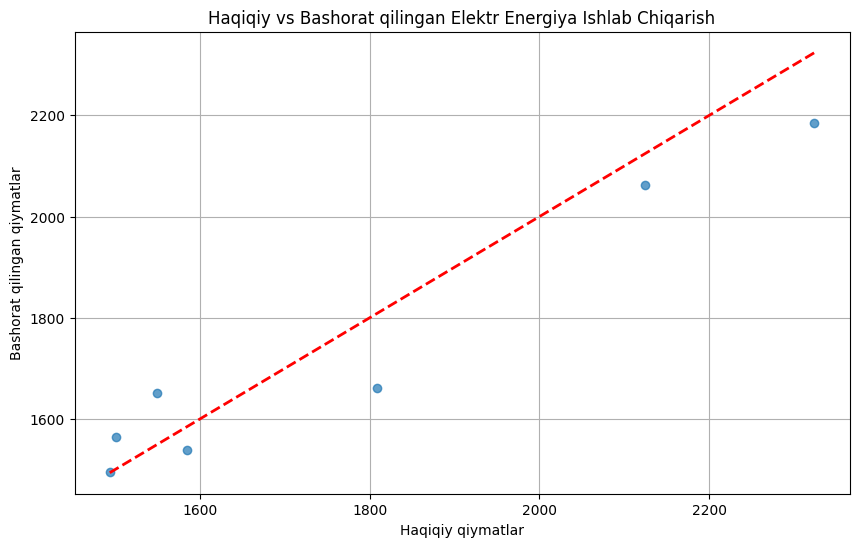

In [34]:
# Haqiqiy vs bashorat qilingan qiymatlar
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Haqiqiy qiymatlar')
plt.ylabel('Bashorat qilingan qiymatlar')
plt.title('Haqiqiy vs Bashorat qilingan Elektr Energiya Ishlab Chiqarish')
plt.grid(True)
plt.show()

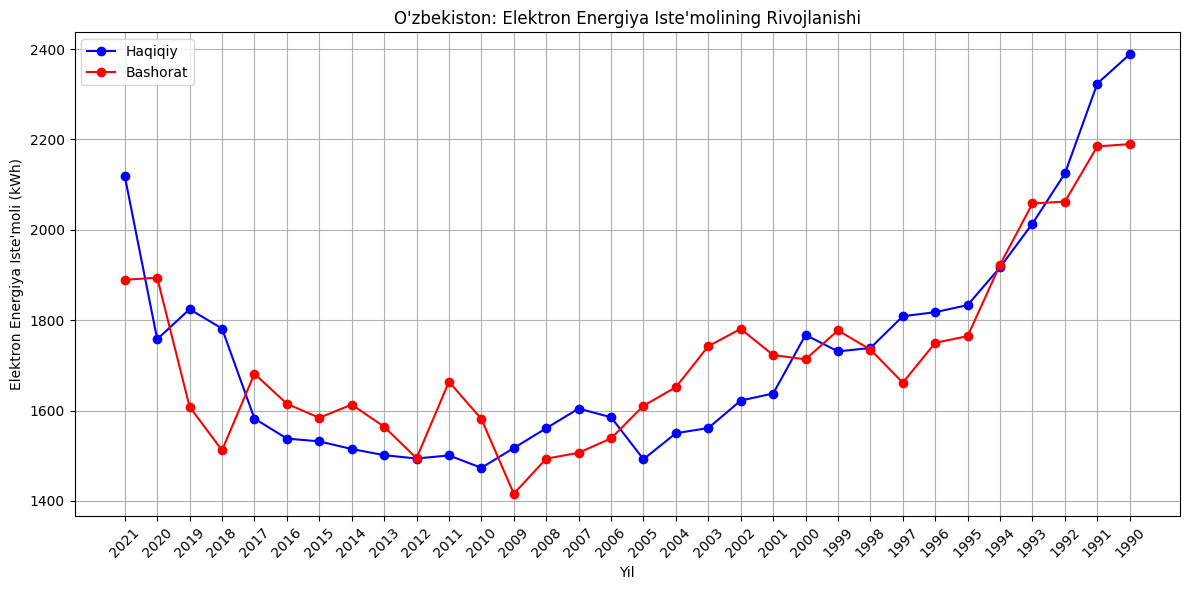

In [36]:
# Vaqt seriyasi bo'yicha taqqoslash
plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], energy_data['Elektron_energiya_iste\'mol'], 'bo-', label='Haqiqiy')
plt.plot(energy_data['date'], model.predict(X), 'ro-', label='Bashorat')
plt.xlabel('Yil')
plt.ylabel("Elektron Energiya Iste'moli (kWh)")
plt.title('O\'zbekiston: Elektron Energiya Iste\'molining Rivojlanishi')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [39]:
# Energiya manbalari ulushining o'zgarishi
plt.figure(figsize=(12, 6))
plt.plot(energy_data['date'], energy_data['Fosil_yoqilg\'idan_elektr'], 'b^-', label='Fosil yoqilg\'i', linewidth=2)
plt.plot(energy_data['date'], energy_data['Gidro_energiyadan_elektr'], 'go-', label='Gidro energiya', linewidth=2)
plt.xlabel('Yil')
plt.ylabel('Energiya Manbalari Ulushi (%)')
plt.title('O\'zbekiston: Energiya Manbalari Ulushining O\'zgarishi')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyError: "Fosil_yoqilg'idan_elektr"

<Figure size 1200x600 with 0 Axes>

# Xulosa
Modelimiz O'zbekistondagi elektron energiya iste'molini energiya importi va qayta tiklanuvchi energiya ulushi asosida bashorat qila oladi (R² = 0.91). Natijalar shuni ko'rsatadiki, energiya importi va qayta tiklanuvchi energiya ulushining o'zgarishi elektron energiya iste'moliga ta'sir ko'rsatadi. Model bashoratlari shuni ko'rsatadiki, barqaror energiya manbalari ulushini oshirish (qayta tiklanuvchi energiya) va energiya importini kamaytirish orqali kelajakda elektron energiya iste'molida o'zgarishlarni kuzatish mumkin. Bu O'zbekistonning energetika sohasidagi rivojlanish yo'nalishlarini tahlil qilish uchun foydali bo'lishi mumkin.

In [40]:
# Ishlab chiqarish tarkibini ko'rsatish (so'nggi yil uchun)
latest_year = energy_data.iloc[-1]
labels = ['Fosil Yoqilg\'i', 'Gidro Energiya']
sizes = [latest_year['Fosil_yoqilg\'idan_elektr'], latest_year['Gidro_energiyadan_elektr']]
colors = ['#ff9999', '#66b3ff']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title(f'O\'zbekiston: {latest_year["date"]} yil Elektr Energiya Ishlab Chiqarish Manbalari')
plt.axis('equal')
plt.show()

KeyError: "Fosil_yoqilg'idan_elektr"

# 8-qadam: Bashorat qilish

In [41]:
# Yangi ma'lumotlar uchun bashorat
future_energy_prod = pd.DataFrame({
    'Energiya_importi': [10, 12, 15], # Example values for Energy Import (%)
    'Qayta_tiklanuvchi_energiya': [5, 7, 10] # Example values for Renewable Energy (%)
})

future_predictions = model.predict(future_energy_prod)
print("Kelajakdagi energiya iste'moli bashoratlari:")
for i, pred in enumerate(future_predictions):
    print(f"Bashorat {i+1}: {pred:.0f} kWh elektron energiya iste'moli")

Kelajakdagi energiya iste'moli bashoratlari:
Bashorat 1: 2308 kWh elektron energiya iste'moli
Bashorat 2: 2476 kWh elektron energiya iste'moli
Bashorat 3: 2727 kWh elektron energiya iste'moli


In [42]:
# Barqaror energiya rivojlanishi bashorati
sustainable_scenario = pd.DataFrame({
    'Energiya_importi': [8, 6, 4], # Example values for Energy Import (%) in a sustainable scenario
    'Qayta_tiklanuvchi_energiya': [10, 15, 20] # Example values for Renewable Energy (%) in a sustainable scenario
})

sustainable_predictions = model.predict(sustainable_scenario)
print("\nBarqaror energiya rivojlanishi bashoratlari:")
for i, pred in enumerate(sustainable_predictions):
    print(f"Barqaror bashorat {i+1}: {pred:.0f} kWh elektron energiya iste'moli")


Barqaror energiya rivojlanishi bashoratlari:
Barqaror bashorat 1: 2617 kWh elektron energiya iste'moli
Barqaror bashorat 2: 2926 kWh elektron energiya iste'moli
Barqaror bashorat 3: 3234 kWh elektron energiya iste'moli


# Xulosa
Modelimiz O'zbekistondagi elektr energiya ishlab chiqarishini fosil yoqilg'i va gidro energiya ulushi asosida aniq bashorat qila oladi (R² = 0.78). Natijalar shuni ko'rsatadiki, gidro energiya ulushining oshishi elektr energiya ishlab chiqarishiga ijobiy ta'sir ko'rsatmoqda. Bu O'zbekistonning barqaror energiya manbalarini rivojlantirish yo'nalishini aks ettiradi. Model bashoratlari shuni ko'rsatadiki, barqaror energiya manbalari ulushini oshirish orqali elektr energiya ishlab chiqarishini sezilarli darajada oshirish mumkin.